In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [6]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022_gex_scvi.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [7]:
new_annotation = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/refined_annotation.csv")

In [ ]:
new_annotation.set_index("Unnamed: 0", inplace=True)

In [19]:
adata.obs["celltype_refined_delta"] = new_annotation["celltype_refined_delta"]

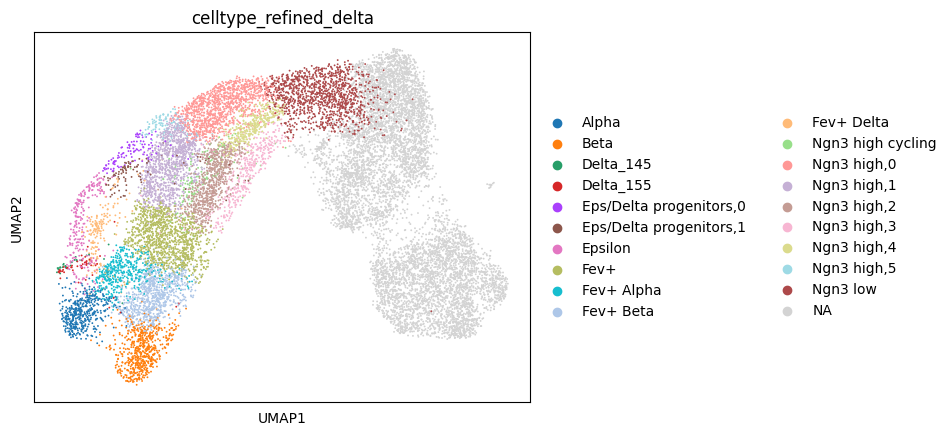

In [20]:
sc.pl.umap(adata, color="celltype_refined_delta")

In [21]:
adata.obsm

AxisArrays with keys: X_pca, X_pca_wsnn, X_scVI, X_scVI_pca, X_spca_wsnn, X_umap, X_umap_ATAC, X_umap_GEX, X_umap_wsnn, umap, umap_ATAC, umap_GEX

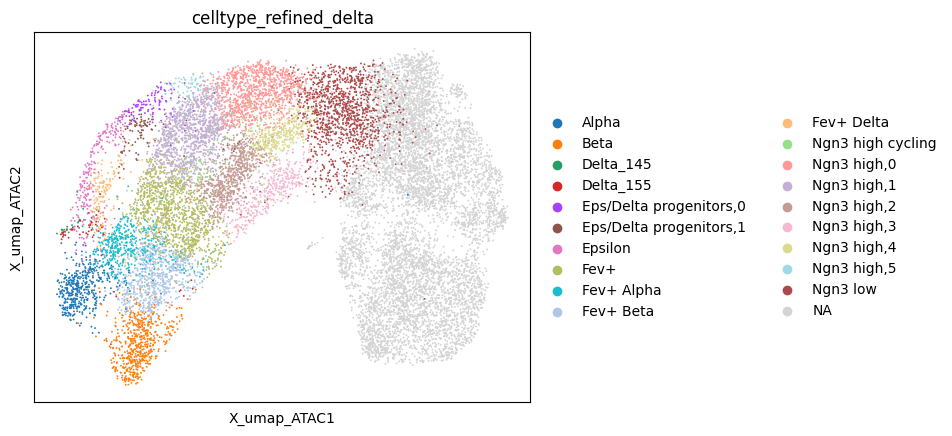

In [23]:
sc.pl.embedding(adata, basis="X_umap_ATAC", color="celltype_refined_delta")

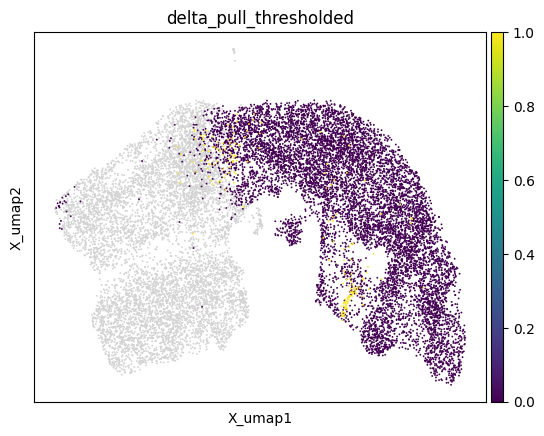

In [35]:
sc.pl.embedding(adata, basis="X_umap", color="delta_pull_thresholded")

In [30]:
adata.obs["delta_pull_thresholded"] = new_annotation["delta_pull_thresholded"]

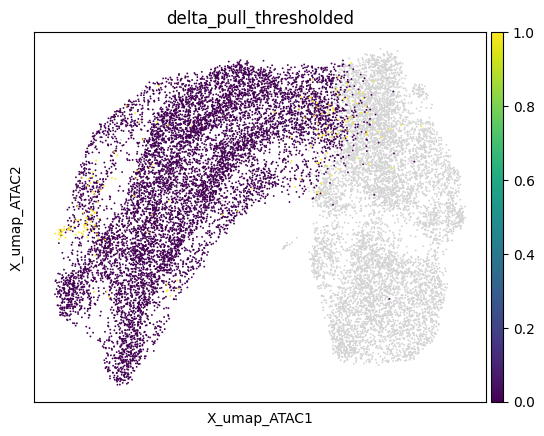

In [31]:
sc.pl.embedding(adata, basis="X_umap_ATAC", color="delta_pull_thresholded")

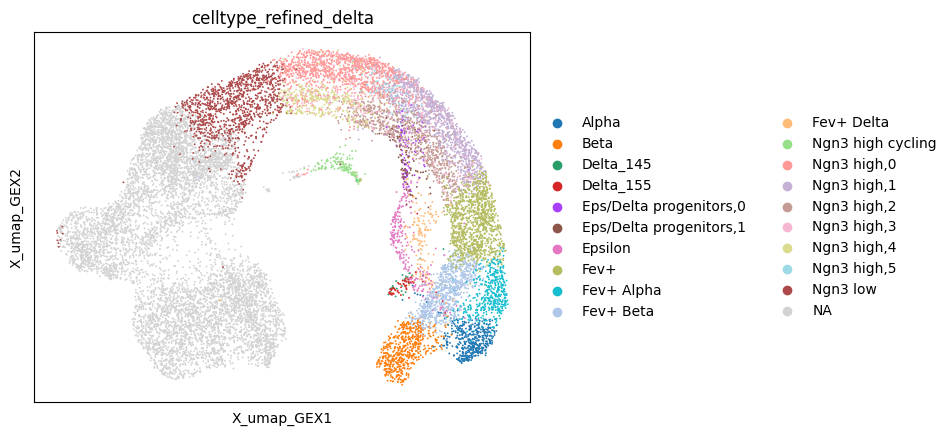

In [32]:
sc.pl.embedding(adata, basis="X_umap_GEX", color="celltype_refined_delta")

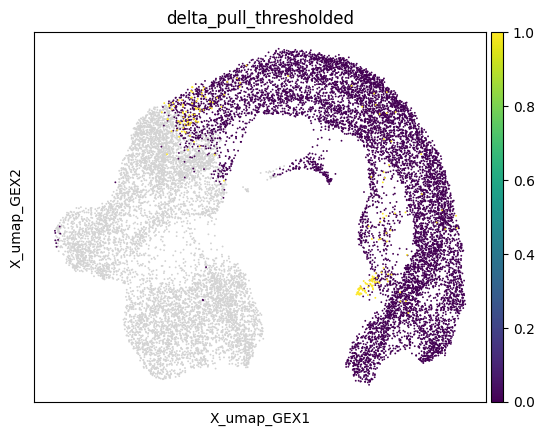

In [33]:
sc.pl.embedding(adata, basis="X_umap_GEX", color="delta_pull_thresholded")